In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df=pd.read_csv('amazon.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [34]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

<ipython-input-34-be44de0f1379>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [35]:
df["Amount"].fillna(0, inplace=True)
df["currency"].fillna("INR", inplace=True)

<ipython-input-35-cbb1a41eaff4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Amount"].fillna(0, inplace=True)
<ipython-input-35-cbb1a41eaff4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

In [36]:
df["ship-postal-code"] = df["ship-postal-code"].astype(str).str.replace(".0", "", regex=False)

In [43]:
def plot_sales_trend(df):
  plt.figure(figsize=(12, 6))
  df.groupby("Date")["Amount"].sum().plot(marker="o", color="b")




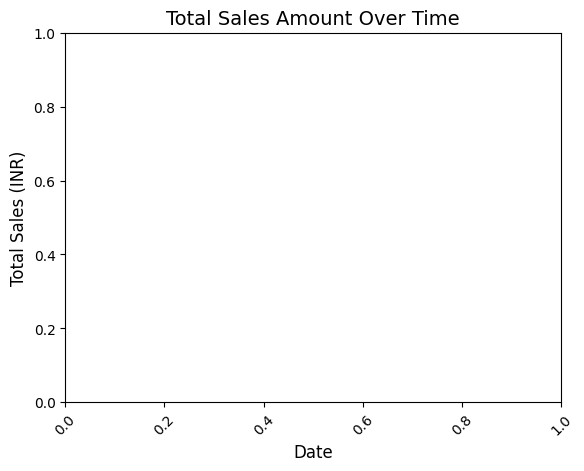

In [44]:
plt.title("Total Sales Amount Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [48]:
def plot_top_categories(df):
    top_categories = df["Category"].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")

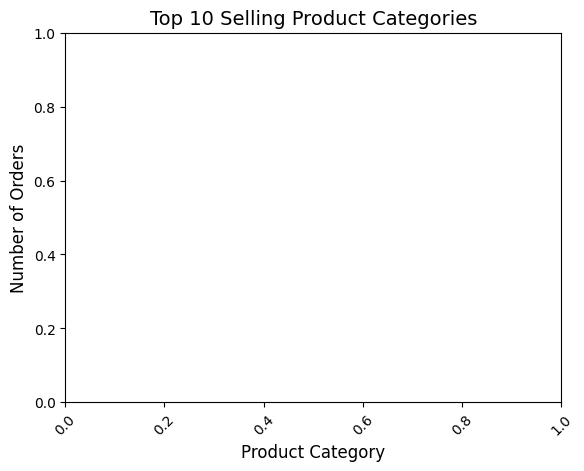

In [49]:
plt.title("Top 10 Selling Product Categories", fontsize=14)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [50]:
def plot_fulfillment_methods(df):
    fulfillment_counts = df["fulfilled-by"].value_counts()
    plt.figure(figsize=(8, 5))
    sns.barplot(x=fulfillment_counts.index, y=fulfillment_counts.values, palette="coolwarm")

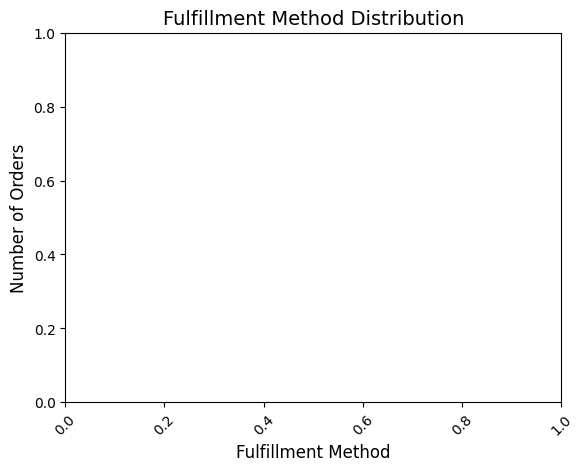

In [52]:
plt.title("Fulfillment Method Distribution", fontsize=14)
plt.xlabel("Fulfillment Method", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-48-19efa01f917d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette="viridis")
<ipython-input-50-6abfce223a08>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fulfillment_counts.index, y=fulfillment_counts.values, palette="coolwarm")


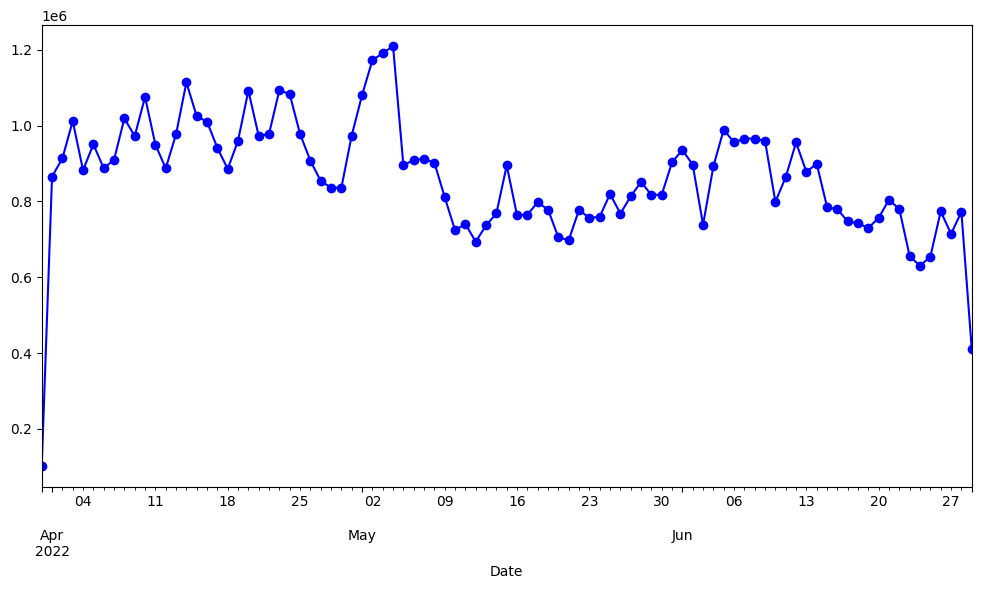

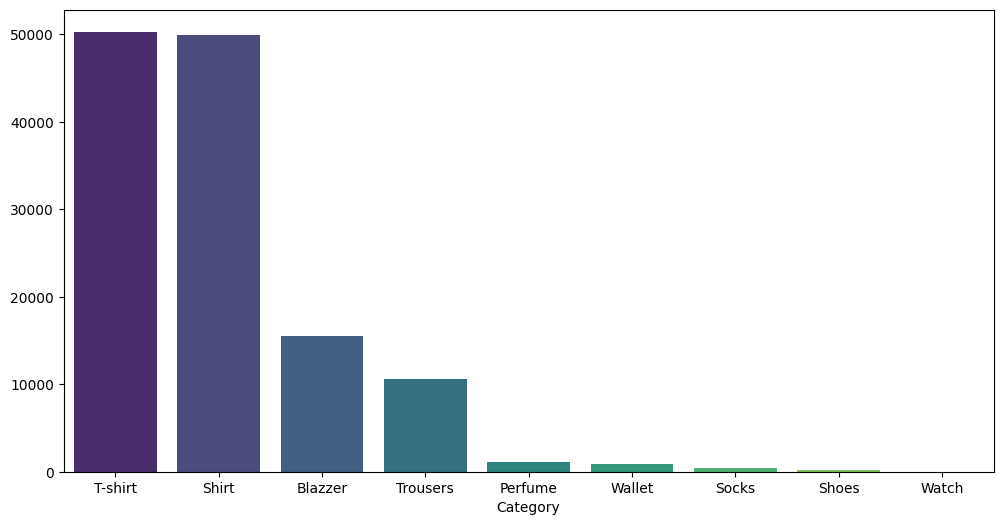

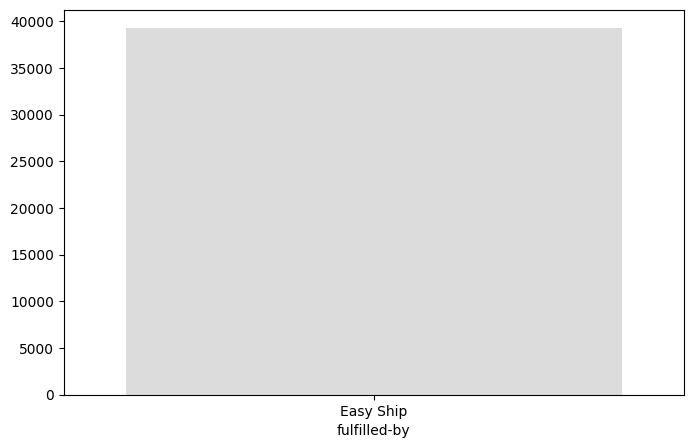

In [54]:
def main():
    # Generate visualizations
    plot_sales_trend(df)
    plot_top_categories(df)
    plot_fulfillment_methods(df)

if __name__ == "__main__":
    main()
